In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset_path = '../../datasets/student_performance.csv'

In [ ]:
df = pd.read_csv(dataset_path, delimiter=',')
df.head()

In [ ]:
def two_str_value_to_int(df:pd.DataFrame, columns:list):
    for column in columns:
        # unique_values = list(df[column].unique())
        if 'yes' in list(df[column].unique()):
            unique_values = ['no', 'yes']
        # if len(unique_values) == 2:
            df[column] = df[column].apply(lambda x: unique_values.index(str(x).lower()))
    return df


In [8]:
str_columns = [
    "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", 
    "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
    "nursery", "higher", "internet", "romantic"
]

df = two_str_value_to_int(df, str_columns)
df[str_columns].head()

In [ ]:
for column in str_columns:
    print(f'column = {column} || unique values = {list(df[column].unique())}')


In [ ]:
df = pd.get_dummies(df)

In [ ]:
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f'Count before drop duplicates: {before}')
print(f'Count after drop duplicates: {after}')

| Nota (0 a 10) | Nota GPA (Escala de 4.0) | Nota Letra |
|---------------------|--------------------------|------------|
| 9.0 a 10.0          | 4.0                      | A          |
| 8.0 a 8.9           | 3.0 - 3.9                | B          |
| 7.0 a 7.9           | 2.0 - 2.9                | C          |
| 6.0 a 6.9           | 1.0 - 1.9                | D          |
| 0 a 5.9             | 0.0                      | F          |


In [ ]:
df['G2'].unique()

In [ ]:
df['GPA_result'] = df['G2'].apply(lambda x: 'PASS' if int(x)/5 >= 2 else 'FAIL')

In [ ]:
# df = df.drop(columns=['G1', 'G2', 'G3'])

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
columns = []
for c in df.columns:
    if c.startswith('Fjob'):
        columns.append(c)

df[columns].head()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def logs(dt, y_test, X_test, y_train):
    # Predição
    y_pred = dt.predict(X_test)

    # Acurácia
    acc = accuracy_score(y_test, y_pred)
    print("Acurácia: {:.2f}".format(acc))

    # Matriz de confusão
    print('Matriz de Confusão')
    cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
    disp.plot()



In [ ]:
columns_to_X = [
    'age', # student's age (numeric: from 15 to 22)
    'Medu', # mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    'Fedu', # father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    'traveltime', # home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    'studytime', # weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    'failures', # number of past class failures (numeric: n if 1<=n<3, else 4)
    'schoolsup', # extra educational support (binary: yes or no)
    'famsup', # family educational support (binary: yes or no)
    'paid', # extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    'activities', # extra-curricular activities (binary: yes or no)
    'nursery', # attended nursery school (binary: yes or no)
    'higher', # wants to take higher education (binary: yes or no)
    'internet', # Internet access at home (binary: yes or no)
    'romantic', # with a romantic relationship (binary: yes or no)
    'famrel', # quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    'freetime', # free time after school (numeric: from 1 - very low to 5 - very high)
    'goout', # going out with friends (numeric: from 1 - very low to 5 - very high)
    # 'Dalc', # workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    # 'Walc', # weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    'health', # current health status (numeric: from 1 - very bad to 5 - very good)
    'absences', # number of school absences (numeric: from 0 to 93)
    # 'G1', # first period grade (numeric: from 0 to 20)
    # 'G2', # second period grade (numeric: from 0 to 20)
    # 'G3', # final grade (numeric: from 0 to 20, output target)
    'school_GP', # student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    'school_MS', # student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    'sex_F', # student's sex (binary: 'F' - female or 'M' - male)
    'sex_M', # student's sex (binary: 'F' - female or 'M' - male)
    'address_R', # student\'s home address type (binary: 'U' - urban or 'R' - rural)
    'address_U', # student\'s home address type (binary: 'U' - urban or 'R' - rural)
    'famsize_GT3', # family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    'famsize_LE3', # family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    'Pstatus_A', # parent\'s cohabitation status (binary: 'T' - living together or 'A' - apart)
    'Pstatus_T', # parent\'s cohabitation status (binary: 'T' - living together or 'A' - apart)
    'Mjob_at_home', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_health', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_other', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_services', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_teacher', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_at_home', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_health', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_other', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_services', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_teacher', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'reason_course', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_home', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_other', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_reputation', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'guardian_father', # student\'s guardian (nominal: 'mother', 'father' or 'other')
    'guardian_mother', # student\'s guardian (nominal: 'mother', 'father' or 'other')
    'guardian_other', # student\'s guardian (nominal: 'mother', 'father' or 'other')
]


In [ ]:
X = df[columns_to_X]
y = df['GPA_result'].map({'PASS':1, 'FAIL':0})
# y = y.map({'PASS':1, 'FAIL':0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth=10, random_state=1)

dt = DecisionTreeClassifier(
    # criterion='gini',
    criterion='entropy',
    splitter='best',
    max_depth=20,
    min_samples_split=0.3,
    # min_samples_leaf=0.1,
    # min_weight_fraction_leaf=0.01,
    max_features='sqrt',
    random_state=1,
    # max_leaf_nodes=50,
    min_impurity_decrease=0.01,
    class_weight='balanced',
    ccp_alpha=0.001
)

dt.fit(X_train, y_train)

logs(dt=dt, y_test=y_test, X_test=X_test, y_train=y_train)

Acurácia: 0.81
Matriz de Confusão


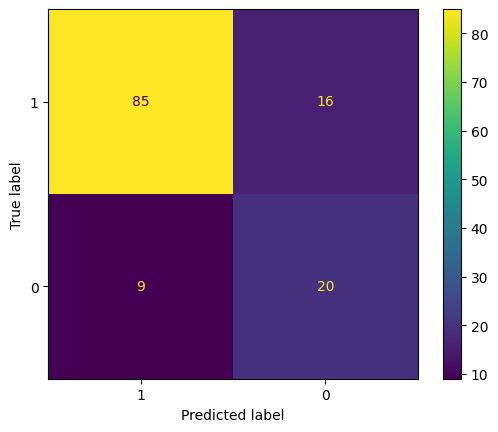

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth=10, random_state=1)

dt = DecisionTreeClassifier(
    # criterion='gini',
    criterion='entropy',
    splitter='best',
    max_depth=20,
    min_samples_split=0.3,
    # min_samples_leaf=0.1,
    # min_weight_fraction_leaf=0.01,
    # max_features='sqrt',
    random_state=1,
    # max_leaf_nodes=50,
    min_impurity_decrease=0.01,
    class_weight='balanced',
    ccp_alpha=0.001
)

dt.fit(X_train, y_train)

logs(dt=dt, y_test=y_test, X_test=X_test, y_train=y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth=10, random_state=1)

dt = DecisionTreeClassifier(
    # criterion='gini',
    criterion='entropy',
    splitter='best',
    max_depth=20,
    min_samples_split=0.2,
    # min_samples_leaf=0.1,
    # min_weight_fraction_leaf=0.01,
    # max_features='sqrt',
    random_state=1,
    # max_leaf_nodes=50,
    # min_impurity_decrease=0.01,
    # class_weight='balanced',
    ccp_alpha=0.01
)

dt.fit(X_train, y_train)

logs(dt=dt, y_test=y_test, X_test=X_test, y_train=y_train)

# DecisionTreeClassifier - Parâmetros Explicados

O `DecisionTreeClassifier` do `sklearn.tree` é um modelo de árvore de decisão usado para classificação. Vamos entender cada parâmetro.

## Parâmetros:

### **1. criterion**
Define a função usada para medir a qualidade da divisão.
- `"gini"`: Usa o índice de Gini para medir a impureza.
- `"entropy"`: Usa a entropia da teoria da informação.
- `"log_loss"`: Usa a perda logarítmica (log loss).

**Exemplo:**
```python
DecisionTreeClassifier(criterion="entropy")
```

### **2. splitter**
Define a estratégia para escolher onde dividir o nó.
- `"best"`: Escolhe a melhor divisão baseada no critério.
- `"random"`: Escolhe uma divisão aleatória entre as melhores.

**Exemplo:**
```python
DecisionTreeClassifier(splitter="random")
```

### **3. max_depth**
Define a profundidade máxima da árvore. Se `None`, cresce até todas as folhas serem puras ou conterem menos que `min_samples_split` amostras.

**Exemplo:**
```python
DecisionTreeClassifier(max_depth=5)
```

### **4. min_samples_split**
Número mínimo de amostras para dividir um nó.
- Pode ser um número inteiro (quantidade absoluta de amostras).
- Pode ser um valor decimal entre 0 e 1 (fração das amostras totais).

**Exemplo:**
```python
DecisionTreeClassifier(min_samples_split=10)  # Mínimo 10 amostras para dividir
DecisionTreeClassifier(min_samples_split=0.1) # 10% das amostras mínimas
```

### **5. min_samples_leaf**
Número mínimo de amostras em um nó folha.
- Pode ser um inteiro ou um valor decimal.

**Exemplo:**
```python
DecisionTreeClassifier(min_samples_leaf=5) # Mínimo 5 amostras em folhas
DecisionTreeClassifier(min_samples_leaf=0.05) # Pelo menos 5% das amostras
```

### **6. min_weight_fraction_leaf**
Peso mínimo que um nó folha deve ter (importante quando há amostras com pesos desbalanceados).

**Exemplo:**
```python
DecisionTreeClassifier(min_weight_fraction_leaf=0.01) # Pelo menos 1% do peso total
```

### **7. max_features**
Número máximo de recursos considerados ao dividir um nó.
- Pode ser um número inteiro.
- `"auto"` ou `"sqrt"` → usa `sqrt(n_features)`.
- `"log2"` → usa `log2(n_features)`.
- Se `None`, usa todos os recursos.

**Exemplo:**
```python
DecisionTreeClassifier(max_features=5)
DecisionTreeClassifier(max_features="sqrt")
```

### **8. random_state**
Define a semente aleatória para reprodução dos resultados.

**Exemplo:**
```python
DecisionTreeClassifier(random_state=42)
```

### **9. max_leaf_nodes**
Número máximo de nós folhas. Se `None`, cresce sem limite.

**Exemplo:**
```python
DecisionTreeClassifier(max_leaf_nodes=50)
```

### **10. min_impurity_decrease**
Redução mínima na impureza necessária para dividir um nó.

**Exemplo:**
```python
DecisionTreeClassifier(min_impurity_decrease=0.01)
```

### **11. class_weight**
Define pesos para classes desbalanceadas.
- `"balanced"`: Ajusta automaticamente os pesos baseando-se na distribuição das classes.
- Dicionário: `{classe: peso}`.

**Exemplo:**
```python
DecisionTreeClassifier(class_weight="balanced")
DecisionTreeClassifier(class_weight={0: 1, 1: 5}) # Classe 1 tem mais peso
```

### **12. ccp_alpha**
Parâmetro de poda baseado na complexidade da árvore.
- Quanto maior o valor, mais poda ocorre.

**Exemplo:**
```python
DecisionTreeClassifier(ccp_alpha=0.01)
```

---

## **Exemplo Completo**

```python
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42,
    class_weight="balanced",
    ccp_alpha=0.01
)
```

Esse modelo cria uma árvore com no máximo 5 níveis de profundidade, usa Gini como critério, divisão baseada na melhor opção e ajusta os pesos das classes automaticamente.


In [ ]:
# import joblib

In [ ]:
# joblib.dump(model, 'house_price_linear_regression_model.pkl')